# D207 Exploratory Data Analysis PA

Vincent Taylor

#### (A1) Inital Question

- What factors contribute to customer churn?

#### (A2)  Organization Benefits 
- The benefits associated with this analysis are as follows, being able to indentify key aspects that contribute to customer churn will allow for the creation of strategies that can be implemented in order to mitigate the amount of customers choosing to churn. This can lead to a direct cost savings by not having to focuse as heavily on marketing to new customers. Another benefit associated for the company would be the competitve advantage that is created by using data in order to inform insights.

#### (A3) Relevant Data
- The churn column (Qualitative/Categorical) will provide us the total count of customers who have discontinued their service in the past month.

- Timely_response (Quantitative/Continous): Survey data asking customers the importance of the company responding within 24 hours.

#### (B1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import seaborn as sns
from scipy.stats import chi2_contingency

# Disabling warinings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the churn.csv into dataframe
df = pd.read_csv('./churn_clean.csv', index_col=0)

In [3]:
#Checking data types and count of rows per column.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
# Cleaning the CSV file

#renaming columns to python casing.
col_head = {
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

#Reexpressing the values of gender to be more concise.
dict_gen = {"gender": {
     "Male": "M",
     "Female": "F",
     "Prefer not to say": "NB",
}}
df.replace(dict_gen, inplace = True)

#Reexpressing the values of marital to be more concise.
dict_mar = {"marital_type": {
     "Never Married": "Single",
}}
df.replace(dict_mar, inplace = True)

#Changing the following to category data type.
df_cat = ['area','marital_type',
          'gender','payment_method','timely_response','timely_fixes',
          'timely_replacements','reliability','options','respectful_response'
          ,'courteous_exchange','active_listening'] 
df[df_cat] = df[df_cat].astype("category")

#Changing the following to string data type.
df_string = ['zip','lat','lng'] 
df[df_string] = df[df_string].astype("str")

In [5]:
df.head()

,customer_id,interaction,UID,city,state,county,zip,lat,lng,population,...,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
df.describe()

,population,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [7]:
df.churn.value_counts()

No     7350
Yes    2650
Name: churn, dtype: int64

In [8]:
df.timely_response.value_counts()

3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: timely_response, dtype: int64

In [9]:
# Creating  a contingency table
churn_crosstab = pd.crosstab(df['churn'], 
df['timely_response'], margins=True, margins_name="subtotal")

In [10]:
churn_crosstab

timely_response,1,2,3,4,5,6,7,subtotal
churn,,,,,,,,
No,158,1002,2562,2473,994,146,15,7350
Yes,66,391,886,885,365,53,4,2650
subtotal,224,1393,3448,3358,1359,199,19,10000


#### (B2)

In [42]:
# Computing Chi-square test
chi, p, dof, expected = chi2_contingency(churn_crosstab)
chi

4.332077523616339

#### Reference
- (1.)Suresh, A. (2023) I used the following website to learn about the different types of chi square tests. No code was copied from this.
-  see section H for website.

In [12]:
# printing p-value
p

0.9931140425294132

In [13]:
# Creating  a contingency table
heatmap = pd.crosstab(df['churn'], 
df['timely_response'])

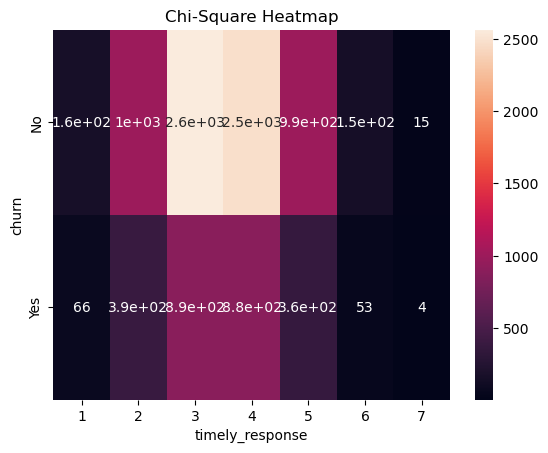

In [14]:
# Heatmap visualization of variables
sns.heatmap(heatmap, annot = True,)

plt.rcParams['figure.figsize'] = (10,7)
plt.title('Chi-Square Heatmap')
plt.show()

#### (B3)
- I chose the Chi squared test due to wanting to know if the number of customers who were likely to churn in a given month and their beliefs on importance of a timely response was statistically significant compared to customers who were not likely to churn. Using Chi Square testing allows me to take two variables and find if there are any associations between the variables, to further drive insights. Furthermore,I looked at perfomring a T-test, but they are mainly used for comparing means of continous variables across to groups, becuase I am using both categorical and discrete variables this wouldn't give me proper insight in this analysis. Lastly the reason I didnt choose ANOVA testing is due to not selecting two or more groups of variables in this analysis.

#### (C1) Univariate Analysis

Continuous Variables
- `outage_sec_perweek`
- `contacts`

Categorical Variables
- `internet_service`
- `payment_method`

In [15]:
df_quant = df[['contacts','outage_sec_perweek']]

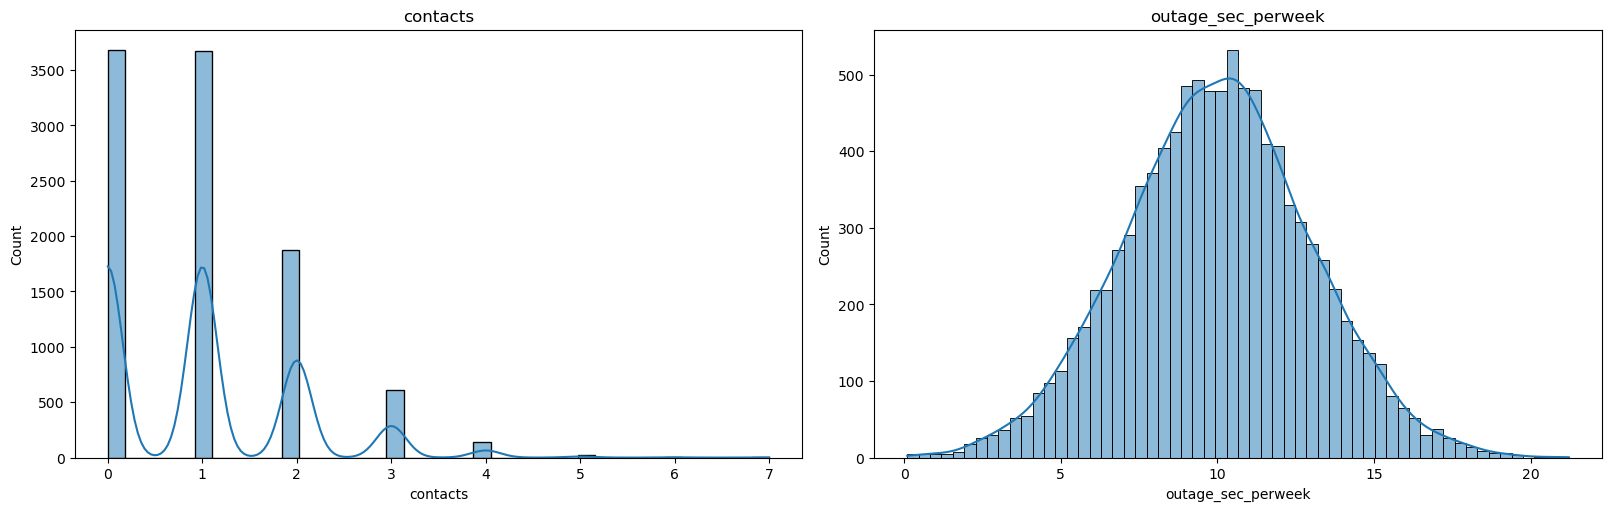

In [16]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(16, 5), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(df_quant.columns, axes):
    sns.histplot(df_quant[col], ax=ax, kde=True)
    ax.set_title(col)

Text(0.5, 1.0, 'Customer Internet Services')

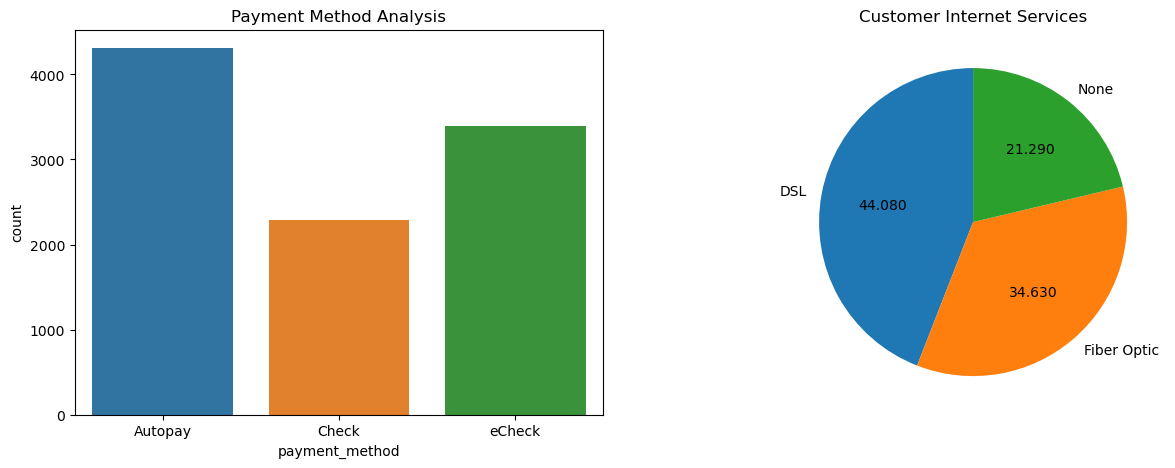

In [17]:
#Univariate analysis of categorical variables
fig, axes = plt.subplots(1,2, figsize=(15, 5))

#Barchart for payment method 
sns.countplot(data=df, x='payment_method', ax=axes[0])
axes[0].set_title('Payment Method Analysis')

# Pie chart of internet services
internet_service = df['internet_service'].value_counts()
axes[1].pie(internet_service, startangle=90, autopct='%.3f', labels=['DSL','Fiber Optic', 'None'])
axes[1].set_title('Customer Internet Services')

In [40]:
df.contacts.describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: contacts, dtype: float64

In [19]:
df.outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: outage_sec_perweek, dtype: float64

In [20]:
df.payment_method.value_counts()

Autopay    4312
eCheck     3398
Check      2290
Name: payment_method, dtype: int64

In [21]:
df.internet_service.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: internet_service, dtype: int64

#### (D1) Bivariate Analysis

Continuous Variables
- `children`
- `bandwidth_gb_year`

Categorical Variables
- `gender`
- `techie`

Text(0, 0.5, 'Bandwidth Usage')

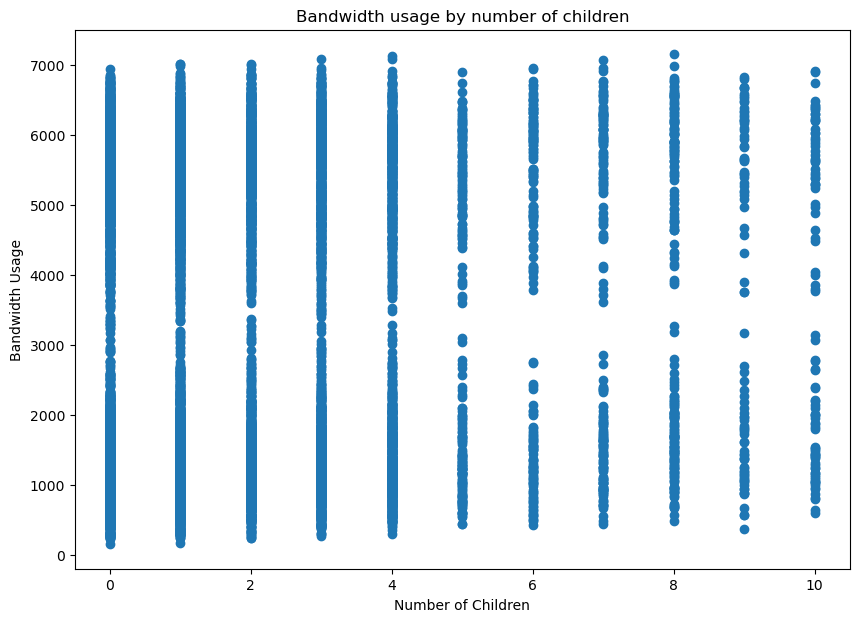

In [22]:
#Scatterplot comparing bandwdidth based on number of children
plt.scatter(df.children, df.bandwidth_gb_year)
plt.title("Bandwidth usage by number of children")
plt.xlabel("Number of Children")
plt.ylabel("Bandwidth Usage")

<Axes: xlabel='techie', ylabel='count'>

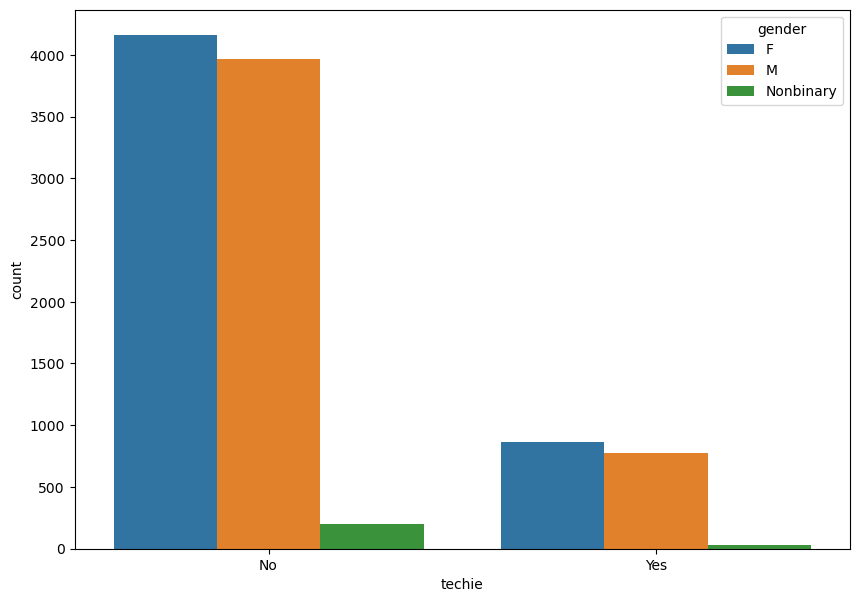

In [23]:
#Barplot comparing count of techie's among customers (split by gender)
sns.countplot(x="techie", hue="gender", data=df)

In [29]:
df[['contacts','outage_sec_perweek']].corr()

,contacts,outage_sec_perweek
contacts,1.000000,0.015092
outage_sec_perweek,0.015092,1.000000


In [30]:
df[['contacts']].describe()

,contacts
count,10000.000000
mean,0.994200
std,0.988466
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


In [33]:
df[['outage_sec_perweek']].describe()

,outage_sec_perweek
count,10000.000000
mean,10.001848
std,2.976019
min,0.099747
25%,8.018214
50%,10.018560
75%,11.969485
max,21.207230


In [25]:
df[['children','bandwidth_gb_year']].corr()

,children,bandwidth_gb_year
children,1.000000,0.025585
bandwidth_gb_year,0.025585,1.000000


In [26]:
df.gender.value_counts()

F            5025
M            4744
Nonbinary     231
Name: gender, dtype: int64

In [27]:
df.techie.value_counts()

No     8321
Yes    1679
Name: techie, dtype: int64

In [28]:
#Bivariate variables in table, calculating correlation between categorical variables
crosstab_1 = pd.crosstab(df['gender'], df['techie'], margins=True)
print(crosstab_1)

techie       No   Yes    All
gender                      
F          4157   868   5025
M          3966   778   4744
Nonbinary   198    33    231
All        8321  1679  10000


#### (E) Summary

(E1)
- The significance level alpha for my hypothesis using chi-square testing is 0.05. After analysis the p-value of 0.993 is greater than the alpha, thus the analysis fails to reject the null hypothesis. To summarize a conclusion is unable to be made that there is any correlation between any the variables used in this analysis.

(E2)
- A major limitation of this analysis, is that we dont know the time period in which the responses were taken, and this may be something benefical to include in future datasets going forward. We are also limited to the 10,000 responses which further limits our ability to pull more valuable insight into correlation, we are also limited to our dataframe with responses from a single company, which is not indicative of the much larger telecom landscape. so we arent able to compare how different telecom providers perform on similar categories. 

(E2) When would chi-square tesst not work
- Had I been working with numerical data the chi-square test would not have been a good choice due to it primarily being useful when using categorical data. ANOVA would have only been useful if I was looking to compare the average between 3+ variables (`monthly_charge`, `income`, `age`). If I was only looking to compare averages of just 2 quantitative variables `monthly_charge` and `tenure` as an example then the t-test would have worked the best for this type of analysis. If the data set was smaller ie less than 50 respondents than the chi-squared would struggle, and potentially lead to more innacurate results.
 

(E3)
- Though neither of the variables in the analysis showed any correlation between each other, I still believe that further analysis is required. I also recommend that we focus on using items such as limiting customer contacts and increasing key survey data to reduce the risk of customer churn.

# Link to Panopto Recording

Origianl submission: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5b18b20b-558c-4de1-ac1b-b0ac01747c05&query=d207

Revision 1: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=31ed9136-5115-4341-b244-b0af018a09a5

# References

(G) Third Party Code
No third party sources were used.


(H) Sources
No sources used.